# Metodos de ensamble

## Mayoria de votos simple

In [4]:
import numpy as np

# Distribcion equitativa de pesos 
ensamble1 = np.argmax(np.bincount([0, 0, 1],weights=[1, 1, 1]))
   
# Asigna clasificacion de acuerdo a distribucion de pesos
ensamble2 = np.argmax(np.bincount([0, 0, 1],weights=[0.2, 0.2, 0.6]))

print('Resultado ensamble 1' + ' = ' + str(ensamble1))
print('Resultado ensamble 2' + ' = ' + str(ensamble2))

# Pregunta: Que hace la funcion np.bincount ? 

Resultado ensamble 1 = 0
Resultado ensamble 2 = 1


In [8]:
# Vector de probabilidades
vectors = np.array([[0.9, 0.1], [0.8, 0.2],[0.4, 0.6]])

# Asigna clasificacion de acuerdo a disttribucion de pesos
ensamble3 = np.average(vectors, axis=0, weights=[0.2, 0.2, 0.6]) 

print('Resultado ensamble 3' + ' = ' + str(ensamble3))

# Pregunta: Como opera el emsamble 3 ? 

Resultado ensamble 3 = [ 0.58  0.42]


## Mayoria de votos multiples modelos

In [9]:
# Importando librerias
from sklearn import datasets
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from MajorityVoteClassifier import MajorityVoteClassifier


from sklearn.cross_validation import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline 
import numpy as np

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Importando informacion
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:] 
le = LabelEncoder() 
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state=1)

In [24]:
# Intanciando modelos
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0) 

clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy',random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1, p=2,metric='minkowski')

# Pregunta: Porque distancia de minkowski con p = 2 ?


In [25]:
# Intanciando modelos

pipe1 = Pipeline([['sc', StandardScaler()],['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN'] 

print('10-fold cross validation:\n')

# Pregunta: Que hace el proceso StandardScaler ?

10-fold cross validation:



In [32]:
# Estimando resultados

for clf, label in zip([pipe1, clf2, pipe3], clf_labels): 
    scores = cross_val_score(estimator=clf,X=X_train, y=y_train,cv=10,scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

# Pregunta: Que hace la funcion cross_val_score ?

ROC AUC: 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]


In [ ]:
# Evaluacion de clasificadores tomando test data

...


In [30]:
# Estimando resultados

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority Voting'] 
all_clf = [pipe1, clf2, pipe3, mv_clf] 
for clf, label in zip(all_clf, clf_labels): 
    scores = cross_val_score(estimator=clf,X=X_train, y=y_train,cv=10,scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label)) 

Accuracy: 0.92 (+/- 0.20) [Logistic Regression]
Accuracy: 0.92 (+/- 0.15) [Decision Tree]
Accuracy: 0.93 (+/- 0.10) [KNN]
Accuracy: 0.97 (+/- 0.10) [Majority Voting]


In [ ]:
# Evaluacion de clasificadores tomando test data

...


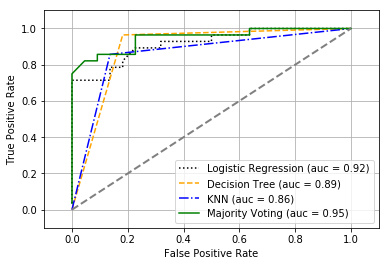

In [34]:
# Evaluando y ajustando el clasificador

from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
import matplotlib.pyplot  as plt

colors = ['black', 'orange', 'blue', 'green'] 
linestyles = [':', '--', '-.', '-'] 
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,linestyle=ls,label='%s (auc = %0.2f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='gray',linewidth=2)
plt.xlim([-0.1, 1.1]) 
plt.ylim([-0.1, 1.1]) 
plt.grid()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

# Referencias
* Raschka, Sebastian. 2015. 22 Bangladesh Journal of Plant Taxonomy Python Machine Learning Unlock.
* https://scikit-learn.org/stable/